# **SVM and Naive bayes: Assignment Questions**

## **Theoretical:-**

### **1. What is a Support Vector Machine (SVM)?**

- A **Support Vector Machine (SVM)** is a **supervised machine learning algorithm** used for **classification** and **regression** tasks. The core idea behind SVM is to find the **optimal hyperplane** that separates data points of different classes with the **maximum margin**.

#### ~ Key Concepts:

* **Hyperplane**: A decision boundary that separates different class labels.

* **Margin**: The distance between the hyperplane and the nearest data points (called **support vectors**) from each class.

* **Support Vectors**: Critical data points that lie closest to the decision boundary and influence its position.

#### ~ Objective:

- Maximize the margin while minimizing classification error:

$$
\min \frac{1}{2} \|w\|^2 \quad \text{subject to } y_i(w^T x_i + b) \geq 1
$$

---

### **2. What is the difference between Hard Margin and Soft Margin SVM?**

-  The difference between Hard Margin and Soft Margin SVM are:-

| Feature         | Hard Margin SVM                              | Soft Margin SVM                         |
| --------------- | -------------------------------------------- | --------------------------------------- |
| Separation      | Requires **perfect** class separation        | Allows **some misclassification**       |
| Use Case        | Ideal for **clean, linearly separable** data | Best for **real-world, noisy** datasets |
| Slack Variables | Not used                                     | Uses slack variables $\xi_i \ge 0$      |
| Regularization  | Not needed                                   | Uses a regularization parameter $C$     |

#### ~ Soft Margin Optimization:

$$
\min \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right)
\quad \text{s.t. } y_i(w^T x_i + b) \geq 1 - \xi_i
$$

---

### **3. What is the mathematical intuition behind SVM?**

- SVM tries to find the hyperplane that **maximizes the margin** between classes. Mathematically, this translates to:

* Finding the **weight vector $w$** and **bias $b$** that minimizes:

  $$
  \frac{1}{2} \|w\|^2
  $$

* Subject to the constraint:

  $$
  y_i(w^T x_i + b) \geq 1 \quad \forall i
  $$

~ This ensures:

* The classes are separated.

* The distance from the closest points (support vectors) to the hyperplane is maximized.

~ For non-linearly separable data, **slack variables** and **kernel functions** are introduced.

---

### **4. What is the role of Lagrange Multipliers in SVM?**

- Lagrange multipliers help solve the **constrained optimization problem** in SVM using **duality theory**.

#### ~ Dual Form (via Lagrangian):

- The SVM problem is expressed as:

$$
\mathcal{L}(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^n \alpha_i[y_i(w^T x_i + b) - 1]
$$

* Introduces **Lagrange multipliers $\alpha_i$** for constraints.

* Solving the **dual problem** allows the use of **kernel trick** for non-linear data.

* Only data points with $\alpha_i > 0$ are **support vectors**.

---

### **5. What are Support Vectors in SVM?**

- **Support Vectors** are the **critical data points** closest to the decision boundary (hyperplane).

#### ~ Importance:

* They **define the margin**.

* The hyperplane is **fully determined** by them.

* Data points not on the margin do **not affect** the decision boundary.

#### ~ In Dual Form:

- Only the support vectors have **non-zero Lagrange multipliers** ($\alpha_i > 0$).

---

### **6. What is a Support Vector Classifier (SVC)?**

- A **Support Vector Classifier (SVC)** is the practical implementation of SVM for **classification tasks**.

* Finds a hyperplane to classify data into distinct classes.

* Uses **kernels** to handle **non-linear** data.

* **Soft-margin** SVCs allow for misclassifications with the help of a **C parameter**.

#### ~ Python Example:

```python
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)
```

---

### **7. What is a Support Vector Regressor (SVR)?**

- **SVR** adapts SVM for **regression problems**.

#### ~ Objective:

* Find a function $f(x)$ that deviates at most $\epsilon$ from the true values $y_i$.

* Minimizes prediction error while keeping the model **flat** (small $w$).

#### ~ Optimization:

$$
\min \frac{1}{2} \|w\|^2 + C \sum (\xi_i + \xi_i^*)
\quad \text{s.t. } |y_i - f(x_i)| \leq \epsilon + \xi_i
$$

---

### **8. What is the Kernel Trick in SVM?**

- The **Kernel Trick** allows SVM to solve **non-linear** problems by **implicitly mapping** input features into **higher dimensions** without explicitly computing the transformation.

#### ~ Key Idea:

- Instead of computing $\phi(x)^T \phi(x')$, compute:

$$
K(x, x') = \langle \phi(x), \phi(x') \rangle
$$

~ Examples:

* Linear: $K(x, x') = x^T x'$

* Polynomial: $K(x, x') = (x^T x' + c)^d$

* RBF: $K(x, x') = \exp(-\gamma \|x - x'\|^2)$

---

### **9. Compare Linear, Polynomial, and RBF Kernels.**

- Comaparison between Linear, Polynomial and RBF Kernels:-

| Kernel     | Formula                      | Use Case                             |
| ---------- | ---------------------------- | ------------------------------------ |
| Linear     | $x^T x'$                     | Linearly separable data              |
| Polynomial | $(x^T x' + c)^d$             | Data with interactions or curves     |
| RBF        | $\exp(-\gamma \|x - x'\|^2)$ | General-purpose, non-linear problems |

* **RBF** is most popular due to its flexibility.

* **Linear** is faster but less expressive.

* **Polynomial** can overfit if degree is too high.

---

### **10. What is the effect of the C parameter in SVM?**

- **C** is the **regularization parameter** in SVM:

* **Low C**: Wider margin, more tolerance for misclassification ⇒ better generalization

* **High C**: Smaller margin, less tolerance for errors ⇒ may overfit

$$
\min \frac{1}{2} \|w\|^2 + C \sum \xi_i
$$

---

### **11. What is the role of the Gamma parameter in RBF Kernel SVM?**

- **Gamma (γ)** defines how far the influence of a **single training example** reaches.

* **Low gamma**: Broad influence ⇒ smoother decision boundary

* **High gamma**: Short influence ⇒ sharp, complex boundary (risk of overfitting)

#### ~ RBF Kernel:

$$
K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$

---

### **12. What is the Naïve Bayes classifier, and why is it called "Naïve"?**

- The **Naïve Bayes classifier** is a **probabilistic machine learning algorithm** used primarily for **classification tasks**. It is based on **Bayes’ Theorem** and assumes that:

- **All features are independent of each other given the class label** — this is the “naïve” assumption.

### ~ Working:

- Given a set of features $X = (x_1, x_2, ..., x_n)$ and a class label $Y$, the classifier calculates the **posterior probability** for each class:

$$
P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)}
$$

- Since $P(X)$ is constant across classes, we can simplify to:

$$
P(Y|X) \propto P(Y) \cdot \prod_{i=1}^{n} P(x_i | Y)
$$

- Then, it predicts the class $Y$ with the highest probability.


- It is called **"naïve"** because of its **strong and unrealistic assumption**:

- That all features $x_1, x_2, ..., x_n$ are **conditionally independent** given the class label.

- In real-world data, features are often correlated. For example, in text classification, the words “money” and “credit” might frequently appear together — but Naïve Bayes treats them as independent.


### ~ Despite Being “Naïve,” It Works Well Because:

* It’s **computationally efficient**

* Needs **less training data**

* Works very well for **text classification, spam detection, and sentiment analysis**

* Is **robust** to irrelevant features

### ~ Summary:

| Feature    | Naïve Bayes                                |
| ---------- | ------------------------------------------ |
| Based on   | Bayes’ Theorem                             |
| Assumption | Feature independence (naïve assumption)    |
| Type       | Probabilistic classifier                   |
| Strengths  | Fast, simple, effective for large features |
| Weaknesses | Poor with highly correlated features       |

---

### **13. What is Bayes’ Theorem?**

- **Bayes’ Theorem** is a fundamental rule in probability theory that describes how to **update the probability of a hypothesis** based on **new evidence**.

- It relates the **conditional** and **marginal** probabilities of random events.


### ~ **Formula:**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

~ Where:

* $P(A|B)$: **Posterior probability** — probability of event A given that B has occurred

* $P(B|A)$: **Likelihood** — probability of observing B given that A is true

* $P(A)$: **Prior probability** — initial belief about A before seeing B

* $P(B)$: **Evidence** — total probability of B under all conditions


### ~ **Interpretation:**

> Bayes’ Theorem allows us to **revise our prior belief** $P(A)$ in light of new data $B$ to get the **posterior probability** $P(A|B)$.


### ~ **Example: Medical Diagnosis**

* Let:

  * A = "Patient has disease"
  * B = "Patient tests positive"

$$
P(\text{Disease}|\text{Positive}) = \frac{P(\text{Positive}|\text{Disease}) \cdot P(\text{Disease})}{P(\text{Positive})}
$$

- This helps doctors compute the **true probability of a disease** given a test result, rather than relying on test accuracy alone.

* **Naïve Bayes** uses Bayes’ Theorem to calculate **posterior probabilities of classes** given input features.

* Helps in **classification** where outcomes depend on multiple features.

---

### **14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**

- *Differences Between Gaussian, Multinomial, and Bernoulli Naïve Bayes**

 - The three types of **Naïve Bayes classifiers** differ based on the **type of input features** they are designed to handle and the **probability distributions** they assume.


### **1. Gaussian Naïve Bayes:**

| Aspect               | Description                                          |                                                                            |
| -------------------- | ---------------------------------------------------- | -------------------------------------------------------------------------- |
| Used For             | **Continuous features**                              |                                                                            |
| Assumption           | Features follow a **normal (Gaussian)** distribution |                                                                            |
| Formula              | \[ P(x\_i                                            | y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x\_i - \mu)^2}{2\sigma^2}} ] |
| Example Applications | Medical datasets, Iris dataset                       |                                                                            |
| Library Class        | `GaussianNB()` in Scikit-learn                       |                                                                            |

### **2. Multinomial Naïve Bayes:**

| Aspect               | Description                                  |             |
| -------------------- | -------------------------------------------- | ----------- |
| Used For             | **Discrete (count-based) features**          |             |
| Assumption           | Features represent **counts or frequencies** |             |
| Formula              | Based on multinomial distribution:           |             |
| \[ P(x               | y) \propto \prod\_i P(x\_i                   | y)^{x\_i} ] |
| Example Applications | Text classification (spam, sentiment)        |             |
| Input Format         | Count vectors (e.g., from CountVectorizer)   |             |
| Library Class        | `MultinomialNB()` in Scikit-learn            |             |


### **3. Bernoulli Naïve Bayes:**

| Aspect               | Description                               |                                    |
| -------------------- | ----------------------------------------- | ---------------------------------- |
| Used For             | **Binary features** (0 or 1)              |                                    |
| Assumption           | Features are **present/absent**           |                                    |
| Formula              | \[ P(x\_i                                 | y) = p^{x\_i} (1 - p)^{1 - x\_i} ] |
| Example Applications | Spam detection, binary bag-of-words       |                                    |
| Input Format         | Binary features (0 = absent, 1 = present) |                                    |
| Library Class        | `BernoulliNB()` in Scikit-learn           |                                    |


### ~ **Summary Table:**

| Feature                | Gaussian NB  | Multinomial NB        | Bernoulli NB      |
| ---------------------- | ------------ | --------------------- | ----------------- |
| Input Type             | Continuous   | Counts (Discrete)     | Binary (0/1)      |
| Distribution Assumed   | Normal       | Multinomial           | Bernoulli         |
| Example Use Case       | Iris dataset | News/spam classifier  | Binary text model |
| Requires Vectorization | No           | Yes (CountVectorizer) | Yes (binary)      |

### ~ When to Use Which?

| Scenario                             | Recommended NB Type     |
| ------------------------------------ | ----------------------- |
| Medical or numerical datasets        | Gaussian Naïve Bayes    |
| Text classification with word counts | Multinomial Naïve Bayes |
| Text classification with 0/1 flags   | Bernoulli Naïve Bayes   |

---

### **15. When should you use Gaussian Naïve Bayes over other variants?**

- You should use **Gaussian Naïve Bayes** when your input features are **continuous (real-valued)** and can be reasonably assumed to follow a **normal (Gaussian) distribution** within each class.

### ~ **Key Conditions to Use Gaussian Naïve Bayes:**

| Condition                                        | Explanation                                  |
| ------------------------------------------------ | -------------------------------------------- |
| ✅ Features are continuous                        | E.g., height, weight, temperature, age       |
| ✅ Each feature is normally distributed           | Bell-shaped curve within class labels        |
| ✅ Problem is **not** about text/categorical data | Multinomial/Bernoulli NB are better for that |
| ✅ You want a **fast, interpretable model**       | Gaussian NB is extremely fast and simple     |


### ~ **Typical Use Cases:**

1. **Medical Datasets**
   E.g., predicting diabetes, heart disease using blood pressure, BMI, cholesterol — all continuous.

2. **Sensor or IoT Data**
   E.g., temperature, humidity, motion intensity readings in classification tasks.

3. **Finance or Risk Modeling**
   E.g., classifying loan defaults using income, age, credit score.

4. **Classic ML Benchmarks**
   E.g., Iris dataset (petal/sepal dimensions).


### ~ **When NOT to Use Gaussian Naïve Bayes:**

| Scenario                                 | Better Option                            |
| ---------------------------------------- | ---------------------------------------- |
| Text data with word counts (TF-IDF, BoW) | Multinomial Naïve Bayes                  |
| Binary features (0 or 1)                 | Bernoulli Naïve Bayes                    |
| Features are heavily skewed or discrete  | Consider tree-based or other classifiers |

### ~ In Summary:

> Use **Gaussian Naïve Bayes** when your features are **continuous** and **normally distributed** — especially in simple, fast, interpretable models for numeric data.

---

### **16. What are the key assumptions made by Naïve Bayes?**

- **Key Assumptions Made by Naïve Bayes:**

 - Naïve Bayes makes a few strong — and often unrealistic — assumptions about the data. Despite this, it works surprisingly well in many applications.

~  Here are the **main assumptions**:


### **1. Feature Independence Given the Class (Naïve Assumption)**

> All features are **conditionally independent** of each other given the class label.

$$
P(x_1, x_2, ..., x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)
$$

* This drastically simplifies computation.

* In reality, features are often correlated — but the algorithm still works reasonably well.


### **2. All Features Are Equally Important**

* Naïve Bayes treats each feature as contributing **equally and independently** to the outcome.

* There’s **no feature interaction** or weighting unless engineered separately.


### **3. Class-Conditional Distribution Depends on Variant**

- Depending on the Naïve Bayes variant used, an assumption is made about the **distribution** of the feature values:

| Variant            | Distribution Assumed     | Feature Type |
| ------------------ | ------------------------ | ------------ |
| **Gaussian NB**    | Normal distribution      | Continuous   |
| **Multinomial NB** | Multinomial distribution | Count-based  |
| **Bernoulli NB**   | Bernoulli distribution   | Binary (0/1) |


### **4. Data Is Representative and Clean**

* Assumes the training data is representative of the real world.

* Naïve Bayes is sensitive to **missing values**, **zero frequencies**, and **imbalanced classes**.

~ Use **Laplace Smoothing** to handle unseen features in test data.


### ~ **Why These Assumptions Matter:**

| Assumption         | Risk If Violated                      | Practical Outcome          |
| ------------------ | ------------------------------------- | -------------------------- |
| Independence       | Overconfidence in probabilities       | May still predict well     |
| Equal contribution | Misses feature importance/interaction | Feature selection may help |
| Distribution       | Misfit can hurt accuracy              | Choose the right variant   |


### ~ In Summary:

> Naïve Bayes assumes that features are **independent**, **equally important**, and **fit a specific distribution** — assumptions that rarely hold fully in practice, but still yield robust and fast classifiers in many domains.

---

### **17. What are the advantages and disadvantages of Naïve Bayes?**

- **Advantages and Disadvantages of Naïve Bayes:-**

### ~ **Advantages of Naïve Bayes:**

| Advantage                              | Explanation                                                                 |
| -------------------------------------- | --------------------------------------------------------------------------- |
| 🎯 **Simple and Fast**                 | Extremely fast to train and predict — even on large datasets.               |
| 🧠 **Works Surprisingly Well**         | Despite its naive assumptions, it often performs well in practice.          |
| 🗃️ **Efficient with High Dimensions** | Scales well with high-dimensional data (e.g., text classification).         |
| 📦 **Requires Less Training Data**     | Can generalize well even with small datasets.                               |
| 📄 **Easy to Implement**               | Simple mathematics and logic make it ideal for quick prototypes.            |
| 💬 **Good for Text and NLP**           | Performs very well in spam filtering, sentiment analysis, etc.              |
| 🔍 **Handles Irrelevant Features**     | Irrelevant features tend to cancel out, not harm performance significantly. |


### ~ **Disadvantages of Naïve Bayes:**

| Disadvantage                          | Explanation                                                                   |
| ------------------------------------- | ----------------------------------------------------------------------------- |
| 🔗 **Strong Independence Assumption** | Assumes features are conditionally independent — rarely true in real data.    |
| ⚖️ **Poor with Correlated Features**  | Fails when features are highly dependent or interact (e.g., height & weight). |
| ❌ **Zero Probability Problem**        | If a feature/category wasn't seen in training, prediction = 0 probability.    |
| 🧪 **Not Ideal for Complex Models**   | Can't capture feature interactions or nonlinear relationships.                |
| ⚠️ **Sensitive to Data Quality**      | Missing values or imbalanced data can affect performance.                     |

- **Solution to zero probability**: Use **Laplace Smoothing**.


### ~ Summary Table:

| Area             | Naïve Bayes Strengths        | Naïve Bayes Weaknesses               |
| ---------------- | ---------------------------- | ------------------------------------ |
| Speed            | ✅ Fastest classifiers        | ❌ Too simple for complex patterns    |
| Accuracy         | ✅ Good for many simple tasks | ❌ Struggles with dependencies        |
| Interpretability | ✅ Highly interpretable       | ❌ Doesn’t reveal feature interaction |
| Scalability      | ✅ Scales well in NLP         | ❌ May need feature engineering       |

### ~ Bottom Line:

> **Naïve Bayes is a powerful baseline model**: if it works well, great — if not, you’ve still learned a lot for minimal effort.

---

### **18. Why is Naïve Bayes a good choice for text classification?**

- Naïve Bayes is one of the **most effective and widely used algorithms** for **text classification tasks** such as:

 - Spam detection

 - Sentiment analysis

 - Topic labeling

 - Document categorization

### 1. **Text Data Is Naturally High-Dimensional and Sparse**

* In text classification, each word becomes a feature (via Bag-of-Words or TF-IDF).

* Most documents use only a **small subset** of the vocabulary ⇒ sparse matrix.

~ **Naïve Bayes handles this efficiently** because:

* It doesn’t require feature interaction modeling.

* It can process thousands of features **very quickly**.


### 2. **Probabilistic Nature Works Well with Word Frequencies**

* Naïve Bayes uses word frequency (or binary presence) to estimate class likelihood.

* Text data fits well into **Multinomial** and **Bernoulli** distributions.

- Example:

 - If “free” appears 10× more often in spam than ham, Naïve Bayes immediately uses that signal to weigh its prediction.


### 3. **Fast Training and Prediction**

* Naïve Bayes requires only **one pass** through the data to compute probabilities.

* Perfect for applications needing **real-time classification** (e.g., email spam filters, news feeds).


### 4. **Robust to Irrelevant Features**

* Many words in text datasets are irrelevant (e.g., “the”, “and”, “is”).

* Naïve Bayes tends to **ignore irrelevant features** rather than being misled by them.

### 5. **Performs Surprisingly Well with Simple Assumptions**

* Even though word positions and grammar are ignored (naïve assumption), it still captures **strong class signals** from word frequency patterns.

 - For example, in spam classification, words like “win”, “offer”, “click” carry more signal than their order.

### ~ Summary Table:

| Reason                       | Why It Helps Naïve Bayes in Text Classification |
| ---------------------------- | ----------------------------------------------- |
| High-dimensional data        | Handles thousands of word features easily       |
| Feature sparsity             | Works well even if most features are 0          |
| Word independence assumption | Acceptable in many text scenarios               |
| Fast computation             | Real-time classification possible               |
| Probabilistic interpretation | Outputs class probabilities                     |


### ~ Common Variants Used in Text:

| Type               | Use Case                             |
| ------------------ | ------------------------------------ |
| **Multinomial NB** | Most common for word counts / TF-IDF |
| **Bernoulli NB**   | Binary word presence (0 or 1)        |


### ~ Final Thought:

- **Naïve Bayes + Bag-of-Words or TF-IDF = A simple yet powerful text classifier.**

---

### **19. Compare SVM and Naïve Bayes for classification tasks.**

- **Comparison: Support Vector Machine (SVM) vs. Naïve Bayes (NB) for Classification Tasks**

 - SVM and Naïve Bayes are both popular supervised learning algorithms used for **classification**, but they differ significantly in terms of **assumptions, performance, complexity, and use cases**.

~ Here's a detailed head-to-head comparison:

### **1. Algorithm Type**

| Feature | SVM                                 | Naïve Bayes                                                |
| ------- | ----------------------------------- | ---------------------------------------------------------- |
| Type    | **Discriminative** model            | **Generative** model                                       |
| Goal    | Finds optimal boundary (hyperplane) | Models joint probability $P(X, Y)$ and uses Bayes’ Theorem |


### **2. Assumptions**

| Feature              | SVM           | Naïve Bayes                                |
| -------------------- | ------------- | ------------------------------------------ |
| Feature independence | ❌ Not assumed | ✅ Strong independence assumption           |
| Data distribution    | No assumption | Depends on variant (Gaussian, multinomial) |


### **3. Performance on Different Data Types**

| Data Type                              | Best Performer                            |
| -------------------------------------- | ----------------------------------------- |
| High-dimensional text data (e.g., NLP) | **Naïve Bayes** (fast, accurate baseline) |
| Complex, non-linear data               | **SVM** with RBF/polynomial kernels       |
| Noisy or redundant features            | **Naïve Bayes** handles them gracefully   |


### **4. Speed & Efficiency**

| Feature          | SVM                                             | Naïve Bayes                      |
| ---------------- | ----------------------------------------------- | -------------------------------- |
| Training speed   | Slower (especially with kernel)                 | Very fast (linear in data size)  |
| Prediction speed | Fast (linear SVM)                               | Very fast                        |
| Scalability      | Moderate (SVM can struggle with large datasets) | Excellent (used in spam filters) |


### **5. Accuracy & Robustness**

| Feature                      | SVM                                    | Naïve Bayes                                 |
| ---------------------------- | -------------------------------------- | ------------------------------------------- |
| Accuracy on complex patterns | ✅ Often higher (non-linear boundaries) | ❌ Lower if independence assumption fails    |
| Outlier sensitivity          | ❌ Sensitive to outliers                | ✅ Robust to outliers                        |
| Overfitting                  | Less prone due to margin maximization  | More prone if not smoothed/labeled properly |


### **6. Interpretability & Explainability**

| Feature           | SVM                            | Naïve Bayes                         |
| ----------------- | ------------------------------ | ----------------------------------- |
| Easy to interpret | ❌ No (especially with kernels) | ✅ Yes (clear probability estimates) |


### ~ **7. Use Cases:**

| Use Case                         | Better Option                         |
| -------------------------------- | ------------------------------------- |
| Spam detection / Email filtering | **Naïve Bayes**                       |
| Handwritten digit classification | **SVM**                               |
| Sentiment analysis               | Both (NB for speed, SVM for accuracy) |
| Image or voice recognition       | **SVM** with kernel tricks            |


### ~ **Summary Table:**

| Aspect              | SVM                               | Naïve Bayes                      |
| ------------------- | --------------------------------- | -------------------------------- |
| Type                | Discriminative                    | Generative                       |
| Assumptions         | No strong assumptions             | Assumes feature independence     |
| Model Complexity    | Medium to High                    | Very Low                         |
| Feature Interaction | Captures complex relations        | Ignores feature interaction      |
| Speed               | Slower (training), fast (predict) | Extremely fast (train & predict) |
| Accuracy            | Higher on complex/clean data      | Competitive on simple/text data  |
| Interpretability    | Lower                             | Higher (probabilities)           |


### ~ Final Verdict:

* Use **Naïve Bayes** when:

  * You want **speed and simplicity**.

  * You're working on **text classification**, especially with large feature spaces.

  * You want an **interpretable, explainable model**.

* Use **SVM** when:

  * You need **high accuracy** and can afford the training time.

  * Your data is **non-linearly separable**.

  * You need to handle **complex decision boundaries** (e.g., RBF kernel).

---

### **20. How does Laplace Smoothing help in Naïve Bayes?**

- **Laplace Smoothing** (also known as **Additive Smoothing**) is a technique used in Naïve Bayes to handle the problem of **zero probabilities** — especially in text classification.

### ~ The Problem:

- In Naïve Bayes, we compute:

$$
P(x_i \mid y) = \frac{\text{count}(x_i, y)}{\text{count}(y)}
$$

 - If a word or feature $x_i$ was **never seen in the training data** for a class $y$, then:

$$
\text{count}(x_i, y) = 0 \Rightarrow P(x_i \mid y) = 0
$$

- This leads to:

$$
P(X \mid y) = 0 \Rightarrow P(y \mid X) = 0
$$

- Which **invalidates the whole prediction**, even if other words strongly suggest the correct class.


### ~ **Laplace Smoothing Formula:**

- For **Multinomial Naïve Bayes**:

$$
P(x_i \mid y) = \frac{\text{count}(x_i, y) + 1}{\sum_{k} \text{count}(x_k, y) + V}
$$

> Where:

* $V$ = vocabulary size (number of unique features/words)

* $1$ = the Laplace smoothing constant (you can generalize with any $\alpha > 0$)


### ~ **What It Does:**

* Adds 1 to every count so **no probability is ever zero**.

* Distributes a small probability mass to **unseen events**.

* Ensures **robustness** when applying the model to new or rare inputs.

### ~ Example:

> Without smoothing:

* “python” never appeared in **class A** ⇒ $P(\text{"python"} \mid A) = 0$

> With Laplace smoothing:

* $P(\text{"python"} \mid A) = \frac{0 + 1}{\text{total words in A} + V} > 0$


### ~ In Scikit-learn:

- You can set `alpha` in the `MultinomialNB` or `BernoulliNB` class:

```python
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=1.0)  # Laplace smoothing
```

### ~ Summary:

| Benefit                   | How Laplace Smoothing Helps                 |
| ------------------------- | ------------------------------------------- |
| Prevents zero probability | Ensures robustness for unseen data          |
| Improves generalization   | Especially important in text classification |
| Simple to implement       | Just add 1 (or α) to all counts             |

---

## **Practical:**

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

















In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the SVM classifier (with RBF kernel)
clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try 'linear' kernel too
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy of SVM Classifier on Iris Dataset:", round(accuracy * 100, 2), "%")
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


 Accuracy of SVM Classifier on Iris Dataset: 100.0 %

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [ ]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the results
print(" Accuracy Comparison on Wine Dataset:")
print(f"🔹 SVM with Linear Kernel: {accuracy_linear * 100:.2f}%")
print(f"🔹 SVM with RBF Kernel   : {accuracy_rbf * 100:.2f}%")

# Which one is better?
if accuracy_linear > accuracy_rbf:
    print("\n Linear Kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("\n RBF Kernel performed better.")
else:
    print("\n Both kernels performed equally.")


 Accuracy Comparison on Wine Dataset:
🔹 SVM with Linear Kernel: 100.00%
🔹 SVM with RBF Kernel   : 80.56%

 Linear Kernel performed better.


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Feature Scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Train an SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict on test set
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform predictions and true labels for MSE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f" Mean Squared Error (MSE) of SVR on Housing Dataset: {mse:.4f}")


 Mean Squared Error (MSE) of SVR on Housing Dataset: 0.3162


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

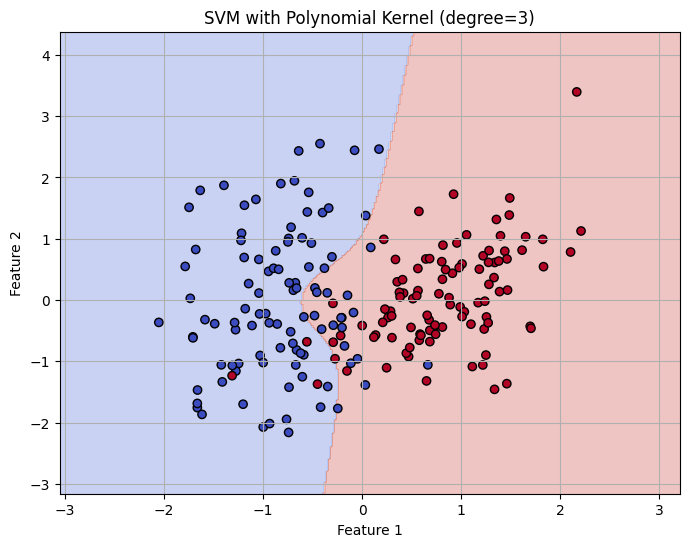

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate synthetic 2D data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Scale features for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X, y)

# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Visualize the trained classifier
plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel (degree=3)")


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset: {accuracy * 100:.2f}%")

# Optional: detailed classification report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


 Accuracy of Gaussian Naïve Bayes on Breast Cancer Dataset: 97.37%

 Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset (selecting a few categories for speed)
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Multinomial Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy of Multinomial Naïve Bayes on 20 Newsgroups: {accuracy * 100:.2f}%")

# Print classification report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


 Accuracy of Multinomial Naïve Bayes on 20 Newsgroups: 79.65%

 Classification Report:

                        precision    recall  f1-score   support

           alt.atheism       0.98      0.37      0.54       175
         comp.graphics       0.94      0.95      0.94       200
               sci.med       0.98      0.85      0.91       200
soc.religion.christian       0.56      0.98      0.72       177

              accuracy                           0.80       752
             macro avg       0.87      0.79      0.78       752
          weighted avg       0.87      0.80      0.79       752



27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

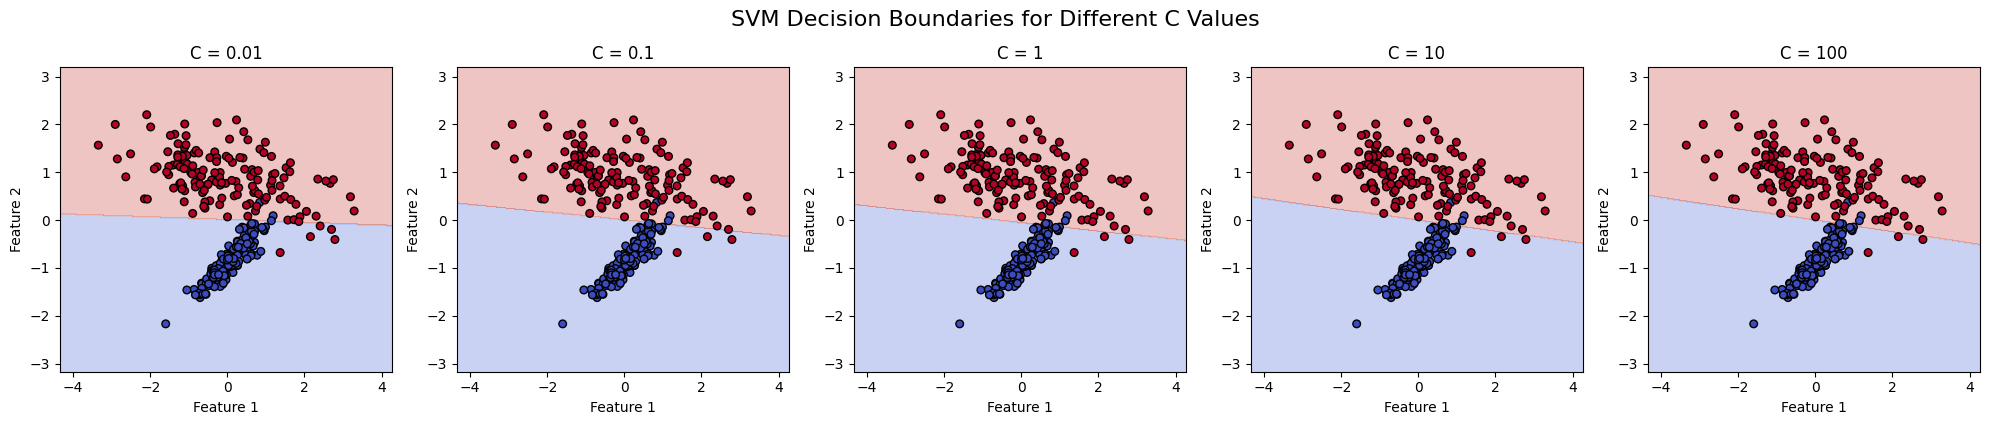

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create a synthetic 2D classification dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define C values to compare
C_values = [0.01, 0.1, 1, 10, 100]

# Plotting decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Create subplots
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 4))
for idx, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y, axes[idx], f"C = {C}")

plt.tight_layout()
plt.suptitle("SVM Decision Boundaries for Different C Values", fontsize=16, y=1.05)
plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Step 2: Binarize the features (0/1)
binarizer = Binarizer(threshold=0.0)
X_binary = binarizer.fit_transform(X)

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y, test_size=0.2, random_state=42
)

# Step 4: Train the Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy of Bernoulli Naïve Bayes: {accuracy * 100:.2f}%")
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


 Accuracy of Bernoulli Naïve Bayes: 75.50%

 Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       101
           1       0.76      0.75      0.75        99

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [ ]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------- Without Feature Scaling ---------
svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --------- With Feature Scaling ---------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# --------- Print Results ---------
print(" SVM Classifier Accuracy Comparison:")
print(f"🔹 Without Scaling: {acc_unscaled * 100:.2f}%")
print(f"🔹 With Scaling   : {acc_scaled * 100:.2f}%")

# Comment on improvement
if acc_scaled > acc_unscaled:
    print("\n Scaling improved model performance.")
elif acc_scaled < acc_unscaled:
    print("\n  Scaling decreased model performance (unusual).")
else:
    print("\n Both models performed equally.")


 SVM Classifier Accuracy Comparison:
🔹 Without Scaling: 80.56%
🔹 With Scaling   : 100.00%

 Scaling improved model performance.


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# 1. Create a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=6, n_classes=2, random_state=42
)

# 2. Discretize continuous features into integer bins (so we can use MultinomialNB)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.2, random_state=42)

# 4. Train MultinomialNB WITHOUT smoothing (alpha=0.0)
nb_no_smoothing = MultinomialNB(alpha=0.0)
nb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = nb_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# 5. Train MultinomialNB WITH Laplace smoothing (alpha=1.0)
nb_smoothing = MultinomialNB(alpha=1.0)
nb_smoothing.fit(X_train, y_train)
y_pred_smoothing = nb_smoothing.predict(X_test)
acc_smoothing = accuracy_score(y_test, y_pred_smoothing)

# 6. Print results
print(" Prediction Comparison (MultinomialNB with & without Laplace Smoothing):")
print(f"🔹 Accuracy without Laplace Smoothing (alpha=0.0): {acc_no_smoothing * 100:.2f}%")
print(f"🔹 Accuracy with Laplace Smoothing (alpha=1.0)  : {acc_smoothing * 100:.2f}%")

# Optional: Print mismatched predictions
if acc_no_smoothing != acc_smoothing:
    mismatches = (y_pred_no_smoothing != y_pred_smoothing).sum()
    print(f"\n Number of predictions that differ due to smoothing: {mismatches}")


 Prediction Comparison (MultinomialNB with & without Laplace Smoothing):
🔹 Accuracy without Laplace Smoothing (alpha=0.0): 77.00%
🔹 Accuracy with Laplace Smoothing (alpha=1.0)  : 77.00%


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']        # Type of kernel
}

# Create a GridSearchCV object with SVC
grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,              # 5-fold cross-validation
    verbose=1,
    n_jobs=-1          # Use all available cores
)

# Fit the model
grid.fit(X_train, y_train)

# Print best hyperparameters
print(" Best Parameters Found by GridSearchCV:")
print(grid.best_params_)

# Evaluate on test data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"\n Test Set Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
 Best Parameters Found by GridSearchCV:
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

 Test Set Accuracy: 100.00%

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 1. Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],   # 90% of class 0, 10% of class 1
    flip_y=0,
    random_state=42
)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Train SVM without class weighting
svm_default = SVC(kernel='rbf', C=1.0, class_weight=None)
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# 4. Train SVM with class weighting
svm_weighted = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

# 5. Print results
print(" SVM Classifier on Imbalanced Dataset")
print(f"🔹 Accuracy without class weighting: {acc_default * 100:.2f}%")
print(f"🔹 Accuracy with class weighting   : {acc_weighted * 100:.2f}%\n")

# 6. Print classification reports
print(" Classification Report (Without Class Weighting):\n")
print(classification_report(y_test, y_pred_default))

print("\n Classification Report (With Class Weighting):\n")
print(classification_report(y_test, y_pred_weighted))


 SVM Classifier on Imbalanced Dataset
🔹 Accuracy without class weighting: 98.00%
🔹 Accuracy with class weighting   : 96.33%

 Classification Report (Without Class Weighting):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       270
           1       1.00      0.80      0.89        30

    accuracy                           0.98       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.98      0.98      0.98       300


 Classification Report (With Class Weighting):

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       270
           1       0.77      0.90      0.83        30

    accuracy                           0.96       300
   macro avg       0.88      0.94      0.91       300
weighted avg       0.97      0.96      0.96       300



33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import urllib.request
import zipfile
import os

# Step 1: Download and load the SMS Spam Collection dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
filename = 'smsspamcollection.zip'

if not os.path.exists('SMSSpamCollection'):
    urllib.request.urlretrieve(url, filename)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

# Step 2: Load the data into a pandas DataFrame
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Step 3: Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# Step 5: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train Multinomial Naïve Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_tfidf)

# Step 8: Evaluate the model
print(" Spam Detection using Naïve Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


 Spam Detection using Naïve Bayes:
Accuracy: 97.85%

 Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Train Naïve Bayes Classifier (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy results
print(" Model Accuracy Comparison on Iris Dataset:")
print(f"🔹 SVM Accuracy       : {acc_svm * 100:.2f}%")
print(f"🔹 Naïve Bayes Accuracy: {acc_nb * 100:.2f}%")

# Optional: Classification reports
print("\n Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm, target_names=data.target_names))

print("\n Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=data.target_names))


 Model Accuracy Comparison on Iris Dataset:
🔹 SVM Accuracy       : 100.00%
🔹 Naïve Bayes Accuracy: 100.00%

 Classification Report for SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale features (chi2 requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -------- Train Naïve Bayes without feature selection --------
nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# -------- Feature Selection: Select top k features --------
k = 10  # Number of top features to keep
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Naïve Bayes with selected features
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# -------- Print results --------
print(" Naïve Bayes Accuracy Comparison (With and Without Feature Selection):")
print(f"🔹 Without Feature Selection : {acc_full * 100:.2f}%")
print(f"🔹 With Top-{k} Feature Selection : {acc_selected * 100:.2f}%")

# Classification reports
print("\n Classification Report (Without Feature Selection):")
print(classification_report(y_test, y_pred_full))

print("\n Classification Report (With Feature Selection):")
print(classification_report(y_test, y_pred_selected))


 Naïve Bayes Accuracy Comparison (With and Without Feature Selection):
🔹 Without Feature Selection : 96.49%
🔹 With Top-10 Feature Selection : 97.37%

 Classification Report (Without Feature Selection):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 Classification Report (With Feature Selection):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [ ]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# Load Wine dataset
data = load_wine()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------- One-vs-Rest (OvR) -----------
ovr_model = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, gamma='scale'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# ----------- One-vs-One (OvO) ------------
ovo_model = OneVsOneClassifier(SVC(kernel='rbf', C=1.0, gamma='scale'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# ----------- Print Accuracy Comparison -----------
print(" Accuracy Comparison on Wine Dataset:")
print(f"🔹 SVM with One-vs-Rest (OvR): {acc_ovr * 100:.2f}%")
print(f"🔹 SVM with One-vs-One (OvO):  {acc_ovo * 100:.2f}%")

# ----------- Optional: Detailed Reports -----------
print("\n Classification Report (OvR):")
print(classification_report(y_test, y_pred_ovr, target_names=data.target_names))

print("\n Classification Report (OvO):")
print(classification_report(y_test, y_pred_ovo, target_names=data.target_names))


 Accuracy Comparison on Wine Dataset:
🔹 SVM with One-vs-Rest (OvR): 77.78%
🔹 SVM with One-vs-One (OvO):  83.33%

 Classification Report (OvR):
              precision    recall  f1-score   support

     class_0       0.82      1.00      0.90        14
     class_1       0.74      1.00      0.85        14
     class_2       0.00      0.00      0.00         8

    accuracy                           0.78        36
   macro avg       0.52      0.67      0.58        36
weighted avg       0.61      0.78      0.68        36


 Classification Report (OvO):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.83      0.71      0.77        14
     class_2       0.60      0.75      0.67         8

    accuracy                           0.83        36
   macro avg       0.81      0.82      0.81        36
weighted avg       0.85      0.83      0.84        36



37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define kernel types to evaluate
kernels = ['linear', 'poly', 'rbf']
results = {}

# Train and evaluate SVM for each kernel
for kernel in kernels:
    clf = SVC(kernel=kernel, C=1.0, gamma='scale', degree=3)  # degree used for 'poly'
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"\n SVM with {kernel.upper()} Kernel:")
    print(f"Accuracy: {acc * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# Print summary
print("\n Kernel Accuracy Summary:")
for kernel, acc in results.items():
    print(f"{kernel.upper()} Kernel: {acc * 100:.2f}%")



 SVM with LINEAR Kernel:
Accuracy: 95.61%
Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


 SVM with POLY Kernel:
Accuracy: 86.84%
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.65      0.79        43
      benign       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


 SVM with RBF Kernel:
Accuracy: 97.37%
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98 

38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset (you can switch to Breast Cancer or Wine dataset too)
data = load_iris()
X, y = data.data, data.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# Stratified K-Fold training and evaluation
print(" Stratified K-Fold Cross-Validation Results:\n")
for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train SVM model
    clf = SVC(kernel='rbf', C=1.0, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"🔹 Fold {fold} Accuracy: {acc * 100:.2f}%")

# Average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\n Average Accuracy across {skf.get_n_splits()} folds: {avg_accuracy * 100:.2f}%")


 Stratified K-Fold Cross-Validation Results:

🔹 Fold 1 Accuracy: 100.00%
🔹 Fold 2 Accuracy: 96.67%
🔹 Fold 3 Accuracy: 90.00%
🔹 Fold 4 Accuracy: 100.00%
🔹 Fold 5 Accuracy: 90.00%

 Average Accuracy across 5 folds: 95.33%


39.  Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
target_names = data.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define different prior probabilities to test
priors_list = [
    None,                     # Let the model learn from data
    [0.5, 0.5],               # Equal class priors
    [0.7, 0.3],               # More bias towards class 0 (malignant)
    [0.3, 0.7],               # More bias towards class 1 (benign)
]

# Train and evaluate models with each set of priors
for i, priors in enumerate(priors_list, start=1):
    print(f"\n Model {i}: Priors = {priors}")
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f" Accuracy: {acc * 100:.2f}%")
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))



 Model 1: Priors = None
 Accuracy: 97.37%
 Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Model 2: Priors = [0.5, 0.5]
 Accuracy: 97.37%
 Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Model 3: Priors = [0.7, 0.3]
 Accuracy: 96.49%
 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96 

40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Scale features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -------- SVM without RFE --------
svm_full = SVC(kernel='linear')
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# -------- SVM with RFE --------
# Use RFE to select top k features
k = 10
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=k)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM on reduced features
svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# -------- Report Results --------
print(" Accuracy Comparison with and without RFE:")
print(f"🔹 Without RFE (all features): {acc_full * 100:.2f}%")
print(f"🔹 With RFE (top {k} features): {acc_rfe * 100:.2f}%")

# Optional: List selected features
selected_features = [name for i, name in enumerate(feature_names) if rfe.support_[i]]
print(f"\n Top {k} Selected Features by RFE:")
for i, f in enumerate(selected_features, 1):
    print(f"{i}. {f}")

# Optional: Classification report
print("\n Classification Report (With RFE):")
print(classification_report(y_test, y_pred_rfe, target_names=data.target_names))


 Accuracy Comparison with and without RFE:
🔹 Without RFE (all features): 95.61%
🔹 With RFE (top 10 features): 97.37%

 Top 10 Selected Features by RFE:
1. mean compactness
2. mean concavity
3. mean concave points
4. radius error
5. area error
6. fractal dimension error
7. worst radius
8. worst texture
9. worst area
10. worst fractal dimension

 Classification Report (With RFE):
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train SVM Classifier (with RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(" Evaluation Metrics (SVM Classifier on Breast Cancer Dataset):\n")
print(f"🔹 Precision: {precision:.2f}")
print(f"🔹 Recall   : {recall:.2f}")
print(f"🔹 F1-Score : {f1:.2f}")

# Optional: Full classification report
print("\n Full Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


 Evaluation Metrics (SVM Classifier on Breast Cancer Dataset):

🔹 Precision: 0.97
🔹 Recall   : 0.99
🔹 F1-Score : 0.98

 Full Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gaussian Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)

# Compute Log Loss (Cross-Entropy Loss)
logloss = log_loss(y_test, y_proba)

# Output the result
print(" Naïve Bayes Classifier Evaluation with Log Loss:")
print(f"🔹 Log Loss: {logloss:.4f}")


 Naïve Bayes Classifier Evaluation with Log Loss:
🔹 Log Loss: 0.2037


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

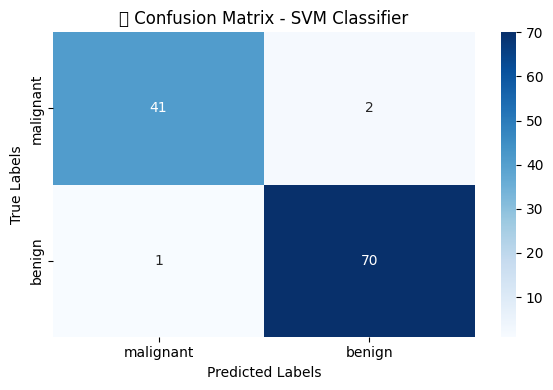


 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
target_names = data.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("🔍 Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Optional: Print detailed classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [ ]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Scale the features and target
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Train SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict and inverse transform the results
y_pred_scaled = svr_model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred)
print(" SVR Regression Evaluation using MAE:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")


 SVR Regression Evaluation using MAE:
🔹 Mean Absolute Error (MAE): 0.3697


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gaussian Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Print result
print(" Naïve Bayes Classifier Evaluation:")
print(f"🔹 ROC-AUC Score: {roc_auc:.4f}")


 Naïve Bayes Classifier Evaluation:
🔹 ROC-AUC Score: 0.9984


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

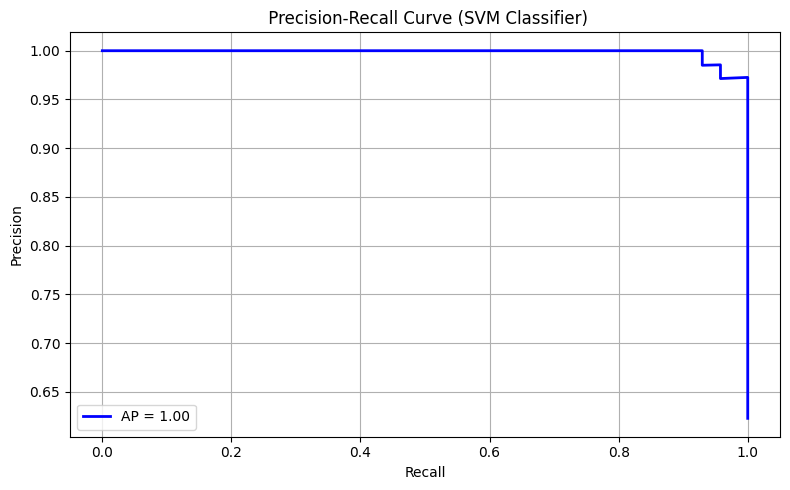

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train SVM with probability estimates enabled
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}', color='blue', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(' Precision-Recall Curve (SVM Classifier)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
